October: Part 2 - This notebook is a continuation of gyre_runs.ipynb, with specific interest in Mackenzie Canyon runs.

In [2]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import Image, display
import glob
%matplotlib inline

In [8]:
def load_gyre_output(path, cfg):
    gridT = nc.Dataset(glob.glob(path + cfg + '/GYRE_*_grid_T.nc')[0])
    gridU = nc.Dataset(glob.glob(path + cfg + '/GYRE_*_grid_U.nc')[0])
    gridV = nc.Dataset(glob.glob(path + cfg + '/GYRE_*_grid_V.nc')[0])
    gridW = nc.Dataset(glob.glob(path + cfg + '/GYRE_*_grid_W.nc')[0])

    lon = gridT.variables['nav_lon']
    lat = gridT.variables['nav_lat']
    tem = gridT.variables['votemper']
    sal = gridT.variables['vosaline']
    ssh = gridT.variables['sossheig']
    U = gridU.variables['vozocrtx']
    V = gridV.variables['vomecrty']
    W = gridW.variables['vovecrtz']
    return lon, lat, tem, sal, ssh, U, V, W

In [12]:
def plot_gyre_times(var, dep, cmin, cmax, cmaps):
    fig, (ax1 ,ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)
    for ax, i in zip([ax1, ax2, ax3], [1,3,5]):
        c = ax.pcolormesh(lon, lat, var[i,9,:,:], cmap=cmaps, vmin = cmin, vmax = cmax) # depth = 135.84467 m
        cbar = fig.colorbar(c, ax=ax)
        cbar.set_clim(cmin,cmax)
        ax.set_title('time ' + str(i))
    return fig

# Run 01
This set of runs shows the effect of reducing the baroclinic timestep (10 seconds), adjusting the frequency of output writing (1 hour), and turning off the wind stress applied. The very small velocities can be attributed to the T and S gradients across partial steps.

| parameter |    1    |   2  |   3   |  4    |   5  |  6 |   7   |   8  | 9 |     10     |   11  |     12    |
|:---------:|:-------:|:----:|:-----:|:-----:|:----:|:--:|:-----:|:----:|:-:|:----------:|:-----:|:---------:|
| rn_rdt    | 2 h     | 2 h  |**8 h**|**3 m**| -    | -  | -     | 15 s | - | **10 s**   | 2 h   | **10 s**  |
| nn_itend  | 360 d   | 10 d | 352 d | 1 d   | -    | -  | -     | 6 h  | - | 6 h        | 360 d | 6 h       |
| nn_write  | 5d      | -    | -     | -     | -    | -  | -     | -    | - | 6 h        | 5 d   | 1 h       |
| nn_tau000 | 100     | -    | -     | -     | -    | 20 | -     | -    | - | 20         | 100   | 100       |
| ztau      | 0.105   | -    | -     | -     | 0.01 | -  | -     | -    | 0 | 0          | **0** | **0**     |
| ztau_sais | 0.015   | -    | -     | -     | -    | -  | 0.001 | -    | 0 | 0          | **0** | **0**     |
| kt        | 1       | 1    | 3     | 9     | 9    | 9  | 9     | X    | 1 | complete*  | X     | complete! |

1. \* (gyre runs but no output files) ! (gyre runs and produces output)
2. kt = ocean time step - in this table, at which the model explodes
3. The spacing ratio tells me the timestep ratio should be 3 m
4. The timestep in nemo must be an even number
5. Reducing the forcing to zero isn't enough, you need to lower the timestep

In [13]:
path = '/ocean/imachuca/NEMO-3.6-code/NEMOGCM/CONFIG/'
cfg = 'gyre_mackenzie01/EXP00'
lon, lat, tem, sal, ssh, U, V, W = load_gyre_output(path, cfg)

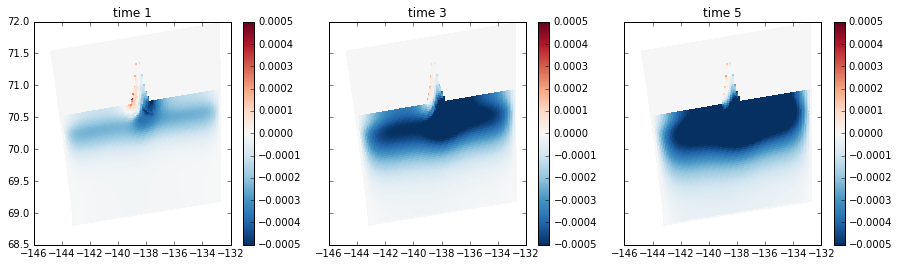

In [14]:
fig = plot_gyre_times(U, 7, -0.0005, 0.0005, cm.RdBu_r) # -0.0006 0.0003

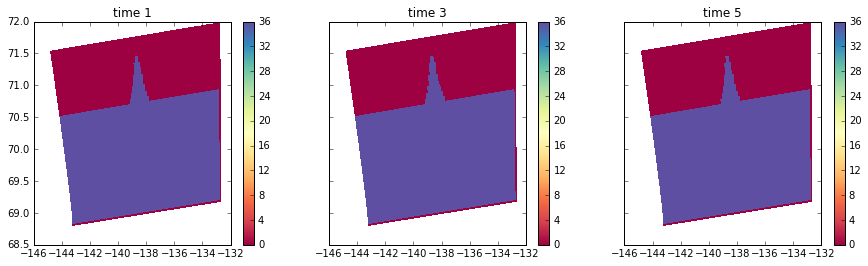

In [15]:
fig = plot_gyre_times(sal, 7, 0, 36, cm.Spectral)